<a href="https://colab.research.google.com/github/shahinaNRI-Degree/PythonMiniProject/blob/main/House%20price%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

In [ ]:
# Introduction to ML
# Used Libraries - random, numpy, pandas,

In [ ]:
# Terms in Machine Learning
# 1.Collection : Data used for training, validating and testing the machine learning model
# 2.Feature (X) : Independent variable or input variable - used to predict the target variable
# 3.Target (Y): Dependent variable - output that - we want to predict -
#Example: Predicting Number of bedrooms
# 4.Training Data : Subset of dataset used to train the model
# 5.Testing Data : Subset of dataset used to validate the trained model
# 6.Model : Mathematical representation of relationship between feature and target
# 7.Supervised Learning (SL) : Training the model based on labelled data || model learns from known/ labeled data
# 8.Regression : Method to predict continuos value from a model - supervised learning
# 9. Overfitting : when a model learns from training data too well, includes noise - perform poorly new data
# 10.Underfitting : Model is too simpler and does not capture patterns in data

## Categories in Machine Learning

# 1.Supervised learning:
# Model learns from labeled data -i/o pairs
# Example : Linear regression, Decision trees, Random forest, SVM
# Best use case so far : House price prediction based on previous/historical data

# 2.Unsupervised learning:
# Model finds new patterns in unlabeled data without predefined data/labels
# Example : Clustering (K mean),PCA
# Use case : Customer segmentation in marketing

# 3.Reinforcement learning:
# Model learns by interacting with environment and receiving the rewards or penalities
# Example : Deep learning, AlphaGo,..
# Best use case : Self car driving vehicles,self learning AI bots,SLAM

In [ ]:
# Example: Predicting the House price - Random dataset - generated

# Steps :
# 1.Generate a random dataset
# 2.Train a ML model - linear regression
# 3.Evaluate the model
# 4.Make prediction

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
# Step 1: Generate a random dataset
np.random.seed(42) # Used to set same sequence of values for the random package
numSamples = 100

size = np.random.randint(800, 5000, numSamples)
bedrooms = np.random.randint(1, 6, numSamples)
washrooms = np.random.randint(1, 8, numSamples)
localityScore = np.random.randint(1, 10, numSamples)

# Generate House prices with randomness
housePrice = (size * 3000) + (bedrooms * 50000) + (washrooms * 30000) + (localityScore * 70000) + np.random.randint(-50000, 50000, numSamples)

# Create a dataframe
df =pd.DataFrame(
    {
       'Size' : size,
       'Bedrooms' : bedrooms,
       'Washrooms' : washrooms,
       'Locality Score' : localityScore,
       'Price' : housePrice
    }
)

In [ ]:
df

,Size,Bedrooms,Washrooms,Locality Score,Price
0,1660,5,2,9,5964758
1,4572,4,7,5,14517747
2,3892,5,7,8,12708752
3,1266,5,6,1,4304573
4,4244,3,2,5,13301101
...,...,...,...,...,...
95,1006,1,6,5,3591286
96,2284,3,5,1,7240450
97,1663,4,6,4,5620352
98,3590,1,3,5,11265069


In [ ]:


# Step 2 : Train a ML model - linear regression

# Package (installation) requirements:
# pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X=df[['Size','Bedrooms','Washrooms','Locality Score']]
Y=df['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,
random_state=42)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
# Step 3 : Evaluate the Model
# Package Requirements
# sklearn.metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = model.predict(X_test)

MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

print(f'Mean Absolute Error : {MAE}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error :   {RMSE}')

Mean Absolute Error : 25385.345481365337
Mean Squared Error : 796791448.4323988
Root Mean Squared Error :   28227.494547557686


In [ ]:
# Step 4 : Make prediction
newHouse = np.array([[4000,4,6,10]])
predictedPrice = model.predict(newHouse)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f'The predicted prize of new house is {predictedPrice[0]}')

The predicted prize of new house is 13069094.887436867


<ipython-input-27-fb44e3497a45>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


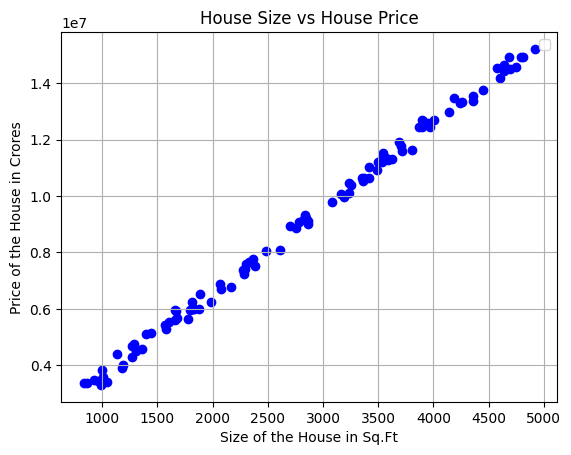

In [ ]:
plt.scatter(df['Size'],df['Price'],color = 'blue')
plt.xlabel('Size of the House in Sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend()
plt.grid(True)
plt.title('House Size vs House Price')
plt.show()

In [ ]:
XSorted = np.sort(X,axis=0)
yPred = model.predict(XSorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-32-8c38c0ca8751>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


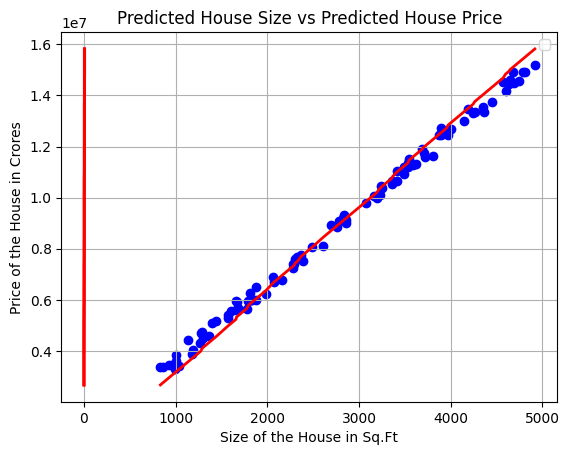

In [ ]:
plt.scatter(df['Size'],df['Price'],color = 'blue')
plt.plot(XSorted, yPred, color = 'red', linewidth = 2)
plt.xlabel('Size of the House in Sq.Ft')
plt.ylabel('Price of the House in Crores')
plt.legend()
plt.grid(True)
plt.title('Predicted House Size vs Predicted House Price')
plt.show()